In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

Files already downloaded and verified
Files already downloaded and verified


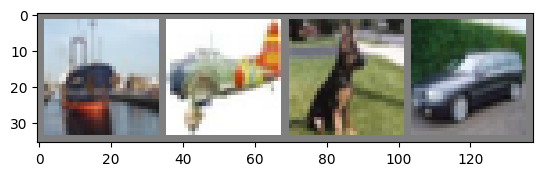

ship  plane dog   car  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


Training with batch size = 1
[1,  2000] mini-batch loss: 2.301
[1,  4000] mini-batch loss: 2.120
[1,  6000] mini-batch loss: 1.991
[1,  8000] mini-batch loss: 1.845
[1, 10000] mini-batch loss: 1.777
[1, 12000] mini-batch loss: 1.733
[1, 14000] mini-batch loss: 1.714
[1, 16000] mini-batch loss: 1.670
[1, 18000] mini-batch loss: 1.669
[1, 20000] mini-batch loss: 1.624
[1, 22000] mini-batch loss: 1.629
[1, 24000] mini-batch loss: 1.626
[1, 26000] mini-batch loss: 1.611
[1, 28000] mini-batch loss: 1.587
[1, 30000] mini-batch loss: 1.582
[1, 32000] mini-batch loss: 1.538
[1, 34000] mini-batch loss: 1.598
[1, 36000] mini-batch loss: 1.551
[1, 38000] mini-batch loss: 1.521
[1, 40000] mini-batch loss: 1.548
[1, 42000] mini-batch loss: 1.523
[1, 44000] mini-batch loss: 1.582
[1, 46000] mini-batch loss: 1.493
[1, 48000] mini-batch loss: 1.550
[1, 50000] mini-batch loss: 1.528
[2,  2000] mini-batch loss: 1.468
[2,  4000] mini-batch loss: 1.495
[2,  6000] mini-batch loss: 1.510
[2,  8000] mini-ba

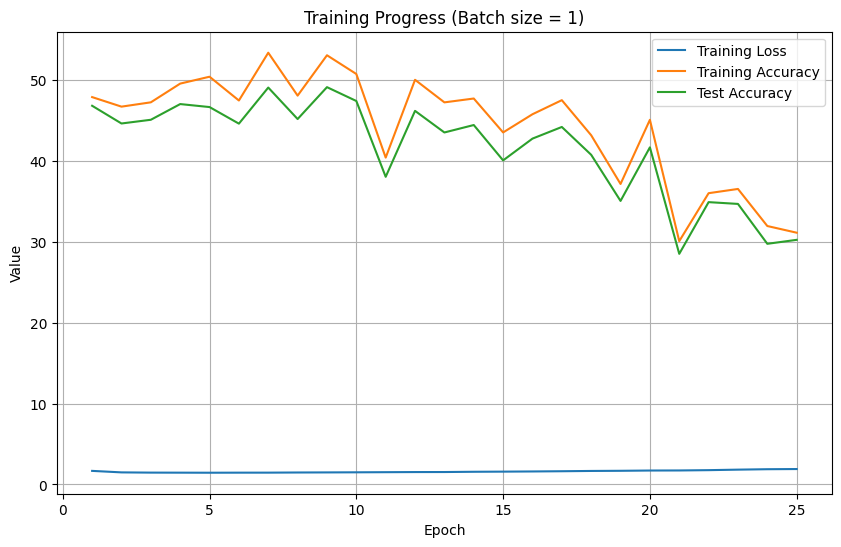


Training with batch size = 4
[1,  2000] mini-batch loss: 2.265
[1,  4000] mini-batch loss: 1.930
[1,  6000] mini-batch loss: 1.736
[1,  8000] mini-batch loss: 1.599
[1, 10000] mini-batch loss: 1.515
[1, 12000] mini-batch loss: 1.500
[2,  2000] mini-batch loss: 1.414
[2,  4000] mini-batch loss: 1.384
[2,  6000] mini-batch loss: 1.353
[2,  8000] mini-batch loss: 1.324
[2, 10000] mini-batch loss: 1.309
[2, 12000] mini-batch loss: 1.300
[3,  2000] mini-batch loss: 1.227
[3,  4000] mini-batch loss: 1.202
[3,  6000] mini-batch loss: 1.221
[3,  8000] mini-batch loss: 1.184
[3, 10000] mini-batch loss: 1.178
[3, 12000] mini-batch loss: 1.168
[4,  2000] mini-batch loss: 1.090
[4,  4000] mini-batch loss: 1.096
[4,  6000] mini-batch loss: 1.115
[4,  8000] mini-batch loss: 1.085
[4, 10000] mini-batch loss: 1.107
[4, 12000] mini-batch loss: 1.097
[5,  2000] mini-batch loss: 0.991
[5,  4000] mini-batch loss: 1.014
[5,  6000] mini-batch loss: 1.028
[5,  8000] mini-batch loss: 1.043
[5, 10000] mini-ba

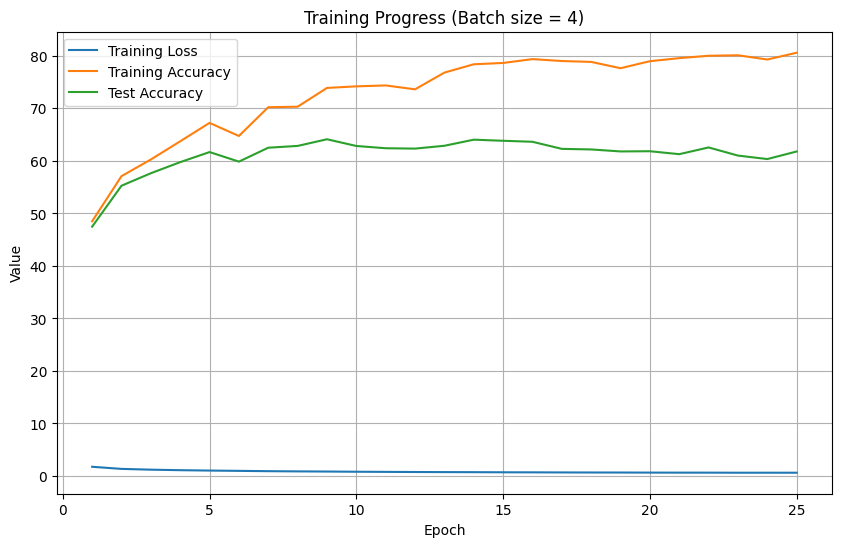


Training with batch size = 800
Finished training with batch size 800
Final Test Accuracy: 30.08%
Saved model to ./cifar_netq5_bs800.pth


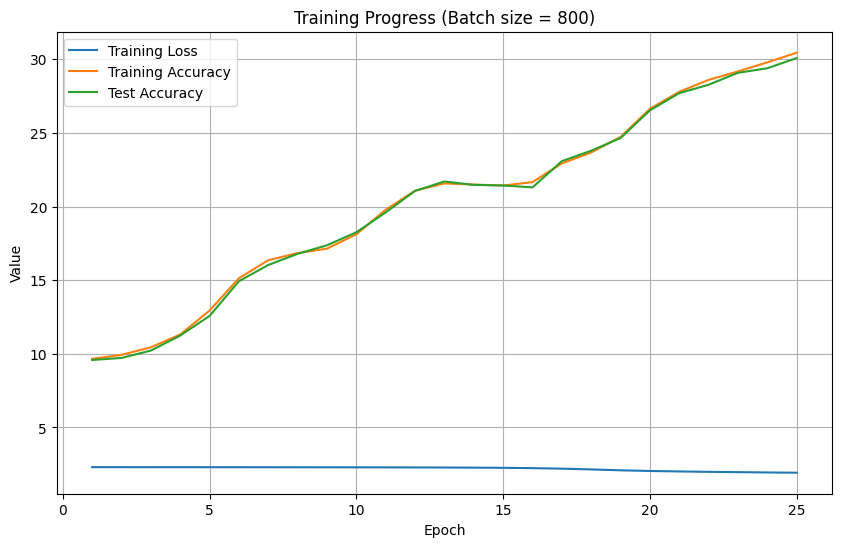

In [7]:
import torch.optim as optim
import matplotlib.pyplot as plt

for batch_size in [1, 4, 800]:  # Different batch sizes
    print(f"\nTraining with batch size = {batch_size}")

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True, num_workers=2
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2
    )

    # Initialize model, loss, and optimizer
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    num_epochs = 25
    train_losses = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_loss = 0.0
        net.train()

        for i, (inputs, labels) in enumerate(trainloader, 0):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            epoch_loss += loss.item()

            if i % 2000 == 1999:
                print(
                    f"[{epoch + 1}, {i + 1:5d}] mini-batch loss: {running_loss / 2000:.3f}"
                )
                running_loss = 0.0

        avg_loss = epoch_loss / len(trainloader)
        train_losses.append(avg_loss)

        # Compute training accuracy
        correct, total = 0, 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in trainloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        train_acc_list.append(100 * correct / total)

        # Compute test accuracy
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc_list.append(100 * correct / total)

    print(f"Finished training with batch size {batch_size}")
    print(f"Final Test Accuracy: {test_acc_list[-1]:.2f}%")

    PATH = f"./cifar_netq5_bs{batch_size}.pth"
    torch.save(net.state_dict(), PATH)
    print(f"Saved model to {PATH}")

    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, train_acc_list, label="Training Accuracy")
    plt.plot(epochs, test_acc_list, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"Training Progress (Batch size = {batch_size})")
    plt.legend()
    plt.grid(True)
    plt.show()


Evaluating model for batch size = 1


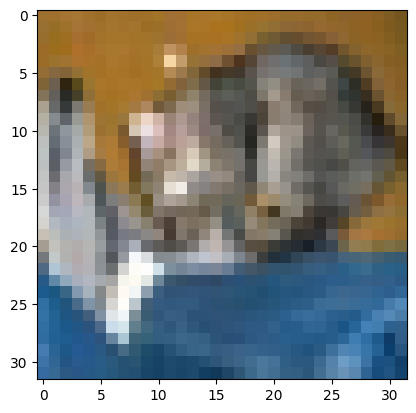

GroundTruth:  cat  
Predicted:  dog  
Accuracy of the network on the 10000 test images: 30.23 %
Accuracy for class: plane is 23.7 %
Accuracy for class: car   is 82.3 %
Accuracy for class: bird  is 11.2 %
Accuracy for class: cat   is 0.6 %
Accuracy for class: deer  is 22.6 %
Accuracy for class: dog   is 78.4 %
Accuracy for class: frog  is 44.3 %
Accuracy for class: horse is 19.8 %
Accuracy for class: ship  is 8.3 %
Accuracy for class: truck is 11.1 %

Evaluating model for batch size = 4


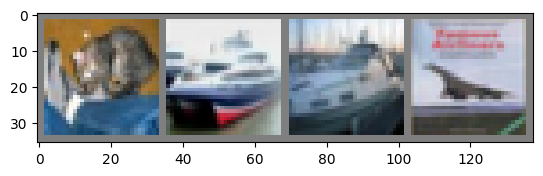

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  ship  plane
Accuracy of the network on the 10000 test images: 61.79 %
Accuracy for class: plane is 66.3 %
Accuracy for class: car   is 76.5 %
Accuracy for class: bird  is 49.5 %
Accuracy for class: cat   is 46.1 %
Accuracy for class: deer  is 46.8 %
Accuracy for class: dog   is 46.1 %
Accuracy for class: frog  is 71.6 %
Accuracy for class: horse is 72.7 %
Accuracy for class: ship  is 79.4 %
Accuracy for class: truck is 62.9 %

Evaluating model for batch size = 800


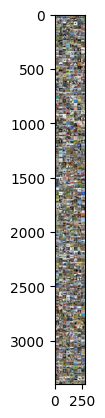

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship  dog   horse ship  frog  horse plane deer  truck dog   bird  deer  plane truck frog  frog  dog   deer  dog   truck bird  deer  car   truck dog   deer  frog  dog   frog  plane truck cat   truck horse frog  truck ship  plane cat   ship  ship  horse horse deer  frog  horse cat   frog  cat   frog  bird  car   bird  cat   horse bird  frog  ship  ship  plane bird  truck cat   cat   ship  ship  car   car   horse bird  dog   bird  horse ship  truck plane cat   ship  frog  deer  frog  frog  plane plane horse deer  dog   frog  cat   car   car   cat   frog  ship  horse deer  plane frog  bird  car   cat   plane deer  bird  horse ship  cat   car   bird  ship  plane ship  cat   dog   bird  deer  car   ship  truck car   bird  truck horse bird  truck frog  dog   frog  cat   ship  horse frog  bird  dog   bird  ship  truck frog  plane plane dog   bird  truck dog   deer  bird  car   frog  frog  sh

In [19]:
for batch_size in [1, 4, 800]:
    print(f"\nEvaluating model for batch size = {batch_size}")

    # Load model for current batch size
    PATH = f"./cifar_netq5_bs{batch_size}.pth"
    net = Net()
    net.load_state_dict(torch.load(PATH, weights_only=True))
    net.eval()

    # Reload testloader for correct batch size
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2
    )

    # Get some random test images
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    # Show images
    imshow(torchvision.utils.make_grid(images))
    print(
        "GroundTruth: ",
        " ".join(f"{classes[labels[j]]:5s}" for j in range(len(labels))),
    )

    # Predict on the sample batch
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    print(
        "Predicted: ",
        " ".join(f"{classes[predicted[j]]:5s}" for j in range(len(predicted))),
    )

    # Overall accuracy on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(
        f"Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %"
    )

    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
